In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc

import seaborn as sns

In [2]:
df = pd.read_csv('Kaggle Glassdoor Gender Pay Gap.csv')
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [3]:
df.Dept.value_counts()

Operations        210
Sales             207
Management        198
Administration    193
Engineering       192
Name: Dept, dtype: int64

In [4]:
del df['Bonus']
del df['PerfEval']
del df['Education']


In [5]:
df["Gender"] = [0 if x == "Male" else 1 for x in df.Gender]
df

,JobTitle,Gender,Age,Dept,Seniority,BasePay
0,Graphic Designer,1,18,Operations,2,42363
1,Software Engineer,0,21,Management,5,108476
2,Warehouse Associate,1,19,Administration,5,90208
3,Software Engineer,0,20,Sales,4,108080
4,Graphic Designer,0,26,Engineering,5,99464
...,...,...,...,...,...,...
995,Marketing Associate,1,61,Administration,1,62644
996,Data Scientist,0,57,Sales,2,108977
997,Financial Analyst,0,48,Operations,1,92347
998,Financial Analyst,0,65,Administration,1,97376


In [6]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(df)
print(X_dummies.columns)
X_dummies

Index(['Gender', 'Age', 'Seniority', 'BasePay', 'JobTitle_Data Scientist',
       'JobTitle_Driver', 'JobTitle_Financial Analyst',
       'JobTitle_Graphic Designer', 'JobTitle_IT', 'JobTitle_Manager',
       'JobTitle_Marketing Associate', 'JobTitle_Sales Associate',
       'JobTitle_Software Engineer', 'JobTitle_Warehouse Associate',
       'Dept_Administration', 'Dept_Engineering', 'Dept_Management',
       'Dept_Operations', 'Dept_Sales'],
      dtype='object')


,Gender,Age,Seniority,BasePay,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
0,1,18,2,42363,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,21,5,108476,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,19,5,90208,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,20,4,108080,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,26,5,99464,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,61,1,62644,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
996,0,57,2,108977,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
997,0,48,1,92347,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
998,0,65,1,97376,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [7]:
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Gender                        1000 non-null   int64
 1   Age                           1000 non-null   int64
 2   Seniority                     1000 non-null   int64
 3   BasePay                       1000 non-null   int64
 4   JobTitle_Data Scientist       1000 non-null   uint8
 5   JobTitle_Driver               1000 non-null   uint8
 6   JobTitle_Financial Analyst    1000 non-null   uint8
 7   JobTitle_Graphic Designer     1000 non-null   uint8
 8   JobTitle_IT                   1000 non-null   uint8
 9   JobTitle_Manager              1000 non-null   uint8
 10  JobTitle_Marketing Associate  1000 non-null   uint8
 11  JobTitle_Sales Associate      1000 non-null   uint8
 12  JobTitle_Software Engineer    1000 non-null   uint8
 13  JobTitle_Warehouse Associate  1000

In [8]:
X = X_dummies.drop(["BasePay"], axis=1)
y = X_dummies["BasePay"]

In [9]:
y

0       42363
1      108476
2       90208
3      108080
4       99464
        ...  
995     62644
996    108977
997     92347
998     97376
999    123108
Name: BasePay, Length: 1000, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [11]:
len(X_train)

750

In [12]:
X_dummies.BasePay.value_counts()

77584     2
77793     2
125770    2
100183    2
97376     2
         ..
116069    1
52578     1
81249     1
95584     1
67585     1
Name: BasePay, Length: 992, dtype: int64

In [13]:
X_train

,Gender,Age,Seniority,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
82,0,21,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
991,1,65,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
789,1,23,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
894,1,57,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
398,0,47,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,28,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
270,1,58,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
860,0,37,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
435,0,63,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [14]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8543315539462119

In [15]:
predictions = reg.predict(X_test)
predictions

array([ 99360.69900821, 151638.36466705, 119047.54911944, 115875.78125646,
       117214.30927455, 100926.30940947,  78339.57439647,  92377.13941438,
        76638.04810723,  96726.38982602, 103356.18983638,  87138.51434416,
       107629.96337011, 113710.28624448, 110715.67764406, 128303.47537894,
        70576.12306335, 110361.73776173,  66545.22628183,  95310.07601332,
        97198.60060958,  78090.10590308, 121373.61779643, 109833.46490217,
        92485.99920629,  81470.75777739, 118243.32642725, 100928.05524286,
       121071.01126474, 113999.93189183, 122422.78610299,  88269.36485491,
        75591.5164835 , 123192.30585012,  63933.34914633,  76808.49068575,
        65700.89612513,  71251.28987896, 104031.35665199,  60735.95956387,
       104590.07818965, 124835.4513786 ,  61584.88051168,  78087.35710408,
       107537.32527124,  93787.66420907,  96232.17388794, 111477.23130054,
        74274.83989859, 100390.85853709,  99750.82531898,  74574.71026718,
        56404.93766142, 1

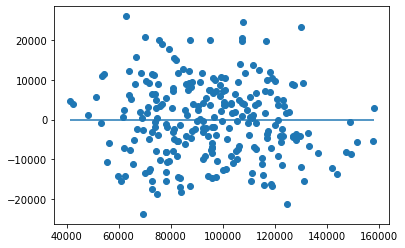

In [16]:
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

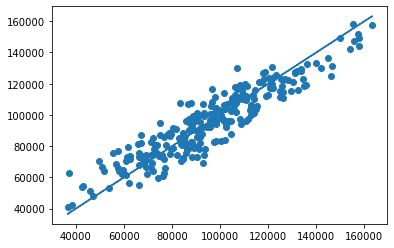

In [17]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test)
plt.show()

In [18]:
X_dummies.corr()

,Gender,Age,Seniority,BasePay,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
Gender,1.000000,0.028625,0.028131,-0.167766,0.018957,0.023775,-0.006976,0.014398,0.034505,-0.168910,0.321643,-0.006812,-0.276604,0.027171,0.023745,-0.004356,-0.028486,-0.011218,0.020399
Age,0.028625,1.000000,-0.021414,0.562681,-0.000238,0.017336,-0.014503,-0.016600,0.018121,0.025100,0.006644,0.022798,-0.012765,-0.044846,-0.018772,-0.028513,-0.005236,0.001627,0.049518
Seniority,0.028131,-0.021414,1.000000,0.511096,-0.004401,-0.005887,-0.006721,0.033390,-0.022437,-0.013508,0.018723,-0.000673,-0.011136,0.011553,0.046517,0.059302,0.001335,-0.070274,-0.033628
BasePay,-0.167766,0.562681,0.511096,1.000000,-0.027873,-0.063599,0.007165,-0.046597,-0.048064,0.383184,-0.257322,-0.013688,0.152506,-0.061054,-0.053696,0.038880,0.039639,-0.089575,0.065570
JobTitle_Data Scientist,0.018957,-0.000238,-0.004401,-0.027873,1.000000,-0.109523,-0.119821,-0.114097,-0.112802,-0.108860,-0.126611,-0.111498,-0.121071,-0.108860,0.035650,-0.020895,-0.025865,0.012152,-0.001190
JobTitle_Driver,0.023775,0.017336,-0.005887,-0.063599,-0.109523,1.000000,-0.109523,-0.104291,-0.103107,-0.099504,-0.115730,-0.101915,-0.110666,-0.099504,-0.004960,0.004661,0.008568,-0.018012,0.009981
JobTitle_Financial Analyst,-0.006976,-0.014503,-0.006721,0.007165,-0.119821,-0.109523,1.000000,-0.114097,-0.112802,-0.108860,-0.126611,-0.111498,-0.121071,-0.108860,0.043847,0.003745,-0.058338,0.067750,-0.057083
JobTitle_Graphic Designer,0.014398,-0.016600,0.033390,-0.046597,-0.114097,-0.104291,-0.114097,1.000000,-0.107414,-0.103660,-0.120564,-0.106172,-0.115288,-0.103660,-0.033357,0.027189,-0.003410,0.019984,-0.010676
JobTitle_IT,0.034505,0.018121,-0.022437,-0.048064,-0.112802,-0.103107,-0.112802,-0.107414,1.000000,-0.102483,-0.119195,-0.104967,-0.113979,-0.102483,-0.013143,-0.029578,0.016969,-0.009668,0.034586
JobTitle_Manager,-0.168910,0.025100,-0.013508,0.383184,-0.108860,-0.099504,-0.108860,-0.103660,-0.102483,1.000000,-0.115029,-0.101298,-0.109996,-0.098901,-0.047546,-0.020227,0.071728,-0.007721,0.003191


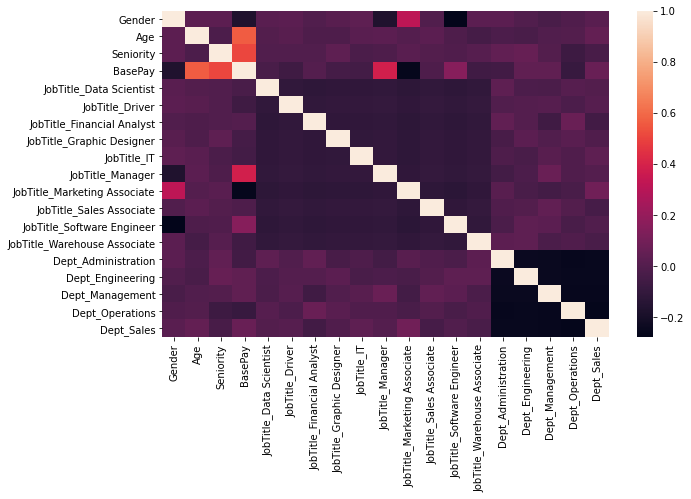

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(X_dummies.corr())
plt.show()

# Model Selection

In [20]:
reg_full = LinearRegression().fit(X, y)
predictions = reg_full.predict(X)

print(reg_full.score(X, y))
print(predictions)

0.8300664132682909
[ 53990.28767362 105778.443447    85575.8772874   98716.35343114
  96063.18361327  75902.93178911  81994.51660102 103595.07277084
 101944.26991839 106242.4156605   94053.71241625  65107.18982787
  77464.49574311  96627.96887103  91586.94460328  61223.22471111
  94702.26742508  90599.55527996  93328.1801658  101488.41976392
 107194.10151469  83640.23662013  78532.78887649  62755.10516391
 106609.27956638  65762.23597082  91497.85728189  84842.37804184
  95468.33539833 104052.87482262  75624.82309049 106563.64242559
  67031.5566422   74017.94513716 115728.61762222 102090.56211874
  96062.14852767  93489.98220372  91867.72195949  76398.66641603
  98250.09088173  84386.52788736  90335.8551761   63978.91837753
 113456.32634303  87350.58920685  69279.14602954  78306.63527275
  75779.46384317  84474.57087784  86579.90986116  90144.7143424
  89524.53545725  78181.84618406  83295.29893266  82358.05508538
  69283.29380857 115152.12489939  97411.74278787  61351.55039211
  84500

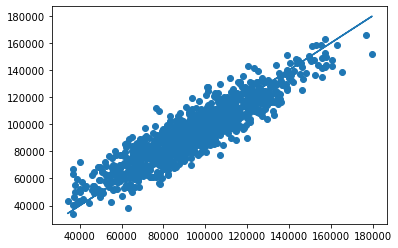

In [21]:
plt.scatter(y, predictions)
plt.plot(y, y)
plt.show()

In [22]:
import pickle

In [23]:
# save the model to disk
filename = 'finalized_model2.sav'
pickle.dump(reg, open(filename, 'wb'))

# Prepare the testing data

In [24]:
df_test = pd.read_csv('Kaggle Glassdoor Gender Pay Gap.csv')

In [25]:
del df_test['Bonus']
del df_test['PerfEval']
del df_test['Education']

In [26]:
df_test["Gender"] = [0 if x == "Male" else 1 for x in df_test.Gender]
df_test

,JobTitle,Gender,Age,Dept,Seniority,BasePay
0,Graphic Designer,1,18,Operations,2,42363
1,Software Engineer,0,21,Management,5,108476
2,Warehouse Associate,1,19,Administration,5,90208
3,Software Engineer,0,20,Sales,4,108080
4,Graphic Designer,0,26,Engineering,5,99464
...,...,...,...,...,...,...
995,Marketing Associate,1,61,Administration,1,62644
996,Data Scientist,0,57,Sales,2,108977
997,Financial Analyst,0,48,Operations,1,92347
998,Financial Analyst,0,65,Administration,1,97376


In [27]:
X_test = pd.get_dummies(df_test)

In [28]:
filename = 'finalized_model2.sav' 
reg_load = pickle.load(open(filename, 'rb'))

In [29]:
predictions = reg_load.predict(X)

print(reg_load.score(X, y))
print(predictions)

0.8289943650833999
[ 54604.01512691 104762.1710681   86076.97113828  97640.17786479
  95116.73298489  74790.85696462  82638.96284874 101452.69507028
 101627.44614399 106406.33743536  93093.27083959  66061.09338983
  77542.9421331   97206.01293744  91933.1139869   61162.21164889
  94355.9939779   91135.62650154  92813.5067677  100875.12371188
 106399.67512504  83173.00184581  78940.90329679  64296.4824136
 104487.88828824  66099.26981851  90430.53513505  85532.55620732
  94894.19337409 103333.57058612  75304.38117852 107252.02456467
  65956.81129163  73817.23591939 116325.3725815  101350.53789836
  95280.15146246  92239.75369306  91619.04979933  75200.06494957
  97882.92558644  84780.23377521  89805.18045266  63789.381291
 112180.85283368  86809.86292946  69404.09873635  79227.329679
  74627.26877373  83861.76547516  86376.90743936  88569.26935425
  87945.81666151  79110.29836775  82562.76968976  82770.84626809
  69457.29494878 114503.04184281  97732.56877056  60735.95956387
  82938.594

In [30]:
X.head()

,Gender,Age,Seniority,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
0,1,18,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,21,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,19,5,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,20,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,26,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [31]:
X.columns

Index(['Gender', 'Age', 'Seniority', 'JobTitle_Data Scientist',
       'JobTitle_Driver', 'JobTitle_Financial Analyst',
       'JobTitle_Graphic Designer', 'JobTitle_IT', 'JobTitle_Manager',
       'JobTitle_Marketing Associate', 'JobTitle_Sales Associate',
       'JobTitle_Software Engineer', 'JobTitle_Warehouse Associate',
       'Dept_Administration', 'Dept_Engineering', 'Dept_Management',
       'Dept_Operations', 'Dept_Sales'],
      dtype='object')

In [32]:
np.zeros(len(X.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [33]:
features_np = ['Gender', 'Age', 'Seniority', 'JobTitle_Data Scientist',
       'JobTitle_Driver', 'JobTitle_Financial Analyst',
       'JobTitle_Graphic Designer', 'JobTitle_IT', 'JobTitle_Manager',
       'JobTitle_Marketing Associate', 'JobTitle_Sales Associate',
       'JobTitle_Software Engineer', 'JobTitle_Warehouse Associate',
       'Dept_Administration', 'Dept_Engineering', 'Dept_Management',
       'Dept_Operations', 'Dept_Sales']
user_input = np.zeros(len(features_np))
user_input2 = np.zeros(len(features_np))

In [34]:
gender = 0
age = 20
seniority = 1
jobTitle = "Warehouse Associate"
dpt = "Operations"

job_idx = features_np.index(f'JobTitle_{jobTitle}')
dept_idx = features_np.index(f'Dept_{dpt}')


user_input[0] = gender
user_input[1] = age
user_input[2] = seniority
user_input[job_idx] = 1
user_input[dept_idx] = 1

user_input2[0] = 1 if gender == 0 else 0
user_input2[1] = age
user_input2[2] = seniority
user_input2[job_idx] = 1
user_input2[dept_idx] = 1

print(user_input)
print(user_input2)

[ 0. 20.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.]
[ 1. 20.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.]


In [35]:
reg_load.predict([user_input, user_input2])

array([48882.49342967, 48311.08908021])

In [36]:
def makeperdictions(gender, age, seniority, jobTitle, dpt):
    features_np = ['Gender', 'Age', 'Seniority', 'JobTitle_Data Scientist',
       'JobTitle_Driver', 'JobTitle_Financial Analyst',
       'JobTitle_Graphic Designer', 'JobTitle_IT', 'JobTitle_Manager',
       'JobTitle_Marketing Associate', 'JobTitle_Sales Associate',
       'JobTitle_Software Engineer', 'JobTitle_Warehouse Associate',
       'Dept_Administration', 'Dept_Engineering', 'Dept_Management',
       'Dept_Operations', 'Dept_Sales']
    
    user_input = np.zeros(len(features_np))
    user_input2 = np.zeros(len(features_np))
    
    job_idx = features_np.index(f'JobTitle_{jobTitle}')
    dept_idx = features_np.index(f'Dept_{dpt}')


    user_input[0] = gender
    user_input[1] = age
    user_input[2] = seniority
    user_input[job_idx] = 1
    user_input[dept_idx] = 1

    user_input2[0] = 1 if gender == 0 else 0
    user_input2[1] = age
    user_input2[2] = seniority
    user_input2[job_idx] = 1
    user_input2[dept_idx] = 1
    
    filename = 'finalized_model2.sav'
    reg_load = pickle.load(open(filename, 'rb'))
    
    preds = reg_load.predict([user_input, user_input2])
    return preds


In [37]:
salaries = makeperdictions(0,24,1,"IT", "Administration")
salaries

array([51812.66149589, 51241.25714644])